The right to live without violence is a fundamental human right. It directly affects the quality and
quantity of individual life, such as shortening of
lifespan, widespread feelings of insecurity, behav-
ioural changes to avoid crime, and so forth (Soares,
2015).

According to the Global Peace Index 2018 report, published by
the Institute of Economics and Peace, India ranked
among the 27 most violent countries and lost 9% of
its GDP (Gross Domestic Product) because of violence in 2017 (IEP, 2018).

During 2005, the total rate of cognizable crime
in India was reported as 455.8 per one lakh popula-
tion, which increased to 487.8 in 2020, showing an
increase of 7.02 percent in 2020 over 2005 (NCRB,
2020).


# Using Regression Models ,Prediction of Statewise number of IPC crimes

Predicting crime , with regression models, is an unusual task because there is no defintie set of things which can be labeled as fixed reasons of crimes in a particular area,state or nation. After studying few research papers,
 we have the following hypothesis on this matter:



*   States which have Higher police officers will file higher crimes and hence will have higher crime numbers . But it is also possible that states with higher crime numbers will also have higher number of sanctioned police.

*   Though internet has had very positive impact on our lives, the darker side can not be neglected. The number of internet users in a state may effect the crime counts.

*  Inflation may give rise to inaccessibility of basic needs for a large group of people in India. This may lead to rise to IPC crimes.
*  As income inequality widens , crimes may also increase.
*  Population increase will definitely increase the number of crimes committed.

*   We also think that the relation with the above said features will be most prominent when we look at the total crime number because not every crime has relation with all of them at the same time but we dont intend to drop too many crime heads because of it so that we can predict number of crimes for as much as possible crime heads.

*  All though it sounded we are talking about linear relationship or colinearity between crime numbers and features but we think applying linear model on a sensitive topic like crime may give rise to huge errors.


###Libraries

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import NotFittedError
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_selector
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import set_config

## We are collecting the data from various sources mentioned in respective blocks.

## Data Collection and preprocessing



### **Crime Crime-Head Wise**


```
NCRB Crime in India data
https://ncrb.gov.in/
```



In [ ]:
Crime_01_12=pd.read_csv("/content/crcIPC.csv")
df_2013=pd.read_csv("/content/crcIPC_2013.csv")

In [ ]:
for i in range(2001, 2013, 1):
  exec(f"df_{i} = pd.DataFrame().assign(States=Crime_01_12['STATE/UT'], Crime_head=Crime_01_12['CRIME HEAD'], Count=Crime_01_12.iloc[:,{i-1999}])")
  exec(f"df_{i}['Year'] = {i}")
df_2013.rename(columns={'STATE/UT':'States','CRIME HEAD':'Crime_head','2013':'Count'},inplace=True)
df_2013['Year']=2013

In [ ]:
#concating the data
crime=pd.concat([df_2001,df_2002,df_2003,df_2004,df_2005,df_2006,df_2007,df_2008,df_2009,df_2010,df_2011,df_2012,df_2013])
#There were some spelling error
crime['States']=crime['States'].str.title()
crime.replace(['A&N Islands','D&N Haveli','Delhi Ut','Total (State)'],['A & N Islands','D & N Haveli','Delhi','Total (States)'],inplace=True)
crime['Crime_head']=crime['Crime_head'].str.title()
crime = crime[~crime['States'].isin(['Total (States)','Total (Uts)'])]
crime.sort_values(by=['States','Year'],inplace=True)
crime.reset_index(inplace=True,drop=True)

<ipython-input-183-e442581e7382>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



###**Police Strength**
```
NCRB Crime in India Data
https://ncrb.gov.in/
```

In [ ]:
police_2001=pd.read_csv('/content/NCRB_2001_Table_88.csv')
police_2002=pd.read_csv('/content/NCRB_2002_Table_17.1.csv')
police_2005=pd.read_csv('/content/NCRB_2005-Table_17.1.csv')
police_2006=pd.read_csv('/content/NCRB_2006_Table_17.1.csv')
police_2007=pd.read_csv('/content/NCRB_2007_Table_17.1.csv')
police_2008=pd.read_csv('/content/NCRB_2008-Table_17.1.csv')
police_2009=pd.read_csv('/content/NCRB_2009_Table_17.1.csv')
police_2010=pd.read_csv('/content/NCRB_2010-Table_17.1.csv')
police_2011=pd.read_csv('/content/NCRB_2011_Table_17.1.csv')

In [ ]:
for i in range(2001,2003):
  exec(f"police_{i}=police_{i}.filter(items=['States/ UTs','Grand Total - Sanctioned','Grand Total - Actual'])")
  exec(f"police_{i}['Year']={i}")
  exec(f"police_{i}.replace(['Uttaranchal','Orissa','Pondicherry'],['Uttarakhand','Odisha','Puducherry'],inplace=True)")
  exec(f"police_{i}['Lack of Police Strength']=police_{i}['Grand Total - Sanctioned']-police_{i}['Grand Total - Actual']")

In [ ]:
for i in range(2005,2012):
  exec(f"police_{i}.rename(columns={{'States/UTs':'States/ UTs'}},inplace=True)")
  exec(f"police_{i}.rename(columns={{'State/UT':'States/ UTs'}},inplace=True)")
  exec(f"police_{i}=police_{i}.filter(items=['States/ UTs','Grand Total - Sanctioned','Grand Total - Actual'])")
  exec(f"police_{i}['Year']={i}")
  exec(f"police_{i}['Lack of Police Strength']=police_{i}['Grand Total - Sanctioned']-police_{i}['Grand Total - Actual']")
  exec(f"police_{i}.replace(['Uttaranchal','Orissa','Pondicherry'],['Uttarakhand','Odisha','Puducherry'],inplace=True)")
  exec(f"police_{i}.replace(['Orissa','Madhya Pradesh *','Karnataka @','Total (All India)'],['Odisha','Madhya Pradesh','Karnataka','Total (All-India)'],inplace=True)")
  exec(f"police_{i}.replace(['Orissa','Jammu & Kashmir $$','Mizoram #','Maharashtra @'],['Odisha','Jammu & Kashmir','Mizoram','Maharashtra'],inplace=True)")


In [ ]:
#Concating the data
lack_police=pd.concat([police_2001,police_2002,police_2005,police_2006,police_2007,police_2008,police_2009,police_2010,police_2011])
lack_police.sort_values(by=['States/ UTs','Year'],inplace=True)
lack_police.reset_index(drop=True,inplace=True)

In [ ]:
#mean value of the data for each state is used later to fill for the missing years
states_uts=lack_police['States/ UTs'].unique()
x=[]
y=[]
z=[]
for i in range(0,len(lack_police['Lack of Police Strength']),9):
  x.append(lack_police['Lack of Police Strength'][i:i+9].mean().astype(int))
  y.append(lack_police['Grand Total - Actual'][i:i+9].mean().astype(int))
  z.append(lack_police['Grand Total - Sanctioned'][i:i+9].mean().astype(int))

In [ ]:
year=[2003,2004,2012,2013]
for year in year:
  exec(f"police_{year}=pd.DataFrame(columns=['States/ UTs','Grand Total - Sanctioned','Grand Total - Actual'])")
  exec(f"police_{year}['States/ UTs']=states_uts")
  exec(f"police_{year}['Grand Total - Sanctioned']=z")
  exec(f"police_{year}['Grand Total - Actual']=y")
  exec(f"police_{year}['Lack of Police Strength']=x")
  exec(f"police_{year}['Year']={year}")
  exec(f"lack_police=pd.concat([lack_police,police_{year}])")

In [ ]:
lack_police.loc[(lack_police['States/ UTs'] == 'Jharkhand') & (lack_police['Year'] == 2001), ['Grand Total - Sanctioned', 'Grand Total - Actual', 'Lack of Police Strength']] = [35345.0, 28958.0, 6386.0]

In [ ]:
lack_police = lack_police[~lack_police['States/ UTs'].isin(['Total (States)','Total (UTs)'])]


In [ ]:
police = pd.concat([lack_police] * 24, ignore_index=True)
police.sort_values(by=['States/ UTs','Year'],inplace=True)
police.reset_index(drop=True,inplace=True)

In [ ]:
police.rename(columns={'States/ UTs':'States'},inplace=True)

### **Internet Penetration**


```
Source: World Bank
```



In [ ]:
ip=pd.read_excel('/content/IP.xls')
ip.drop(columns=["Country Name","2014","2015","2016","2017","2018","2019","2020","2021","2022","2023"],inplace=True)
ip=ip.transpose()
ip['Year']=ip.index.astype(int)
ip.columns = ['Internet Penetration','Year']
ip = pd.concat([ip] *864 , ignore_index=True)
ip.sort_values(by=['Year'],inplace=True)
ip.reset_index(drop=True,inplace=True)

### **Inflation**
```
[link text](https://labourbureau.gov.in/rate-of-inflation)
```

In [ ]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
url="https://labourbureau.gov.in/rate-of-inflation"
response=requests.get(url, verify=False)
soup= BeautifulSoup(response.text, 'html.parser')
table=soup.find(class_="table")
values=[]
for j in range(9,31):
   data=table.find_all('tr')[j]
   for i in range(13):
    values.append(data.find_all("td")[i].text.strip())
from tabulate import tabulate
num_columns=13
tabular_data=[values[i:i+num_columns] for i in range(0,len(values),num_columns)]
new_header = ["Year", "January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
tabular_data.insert(0,new_header)

table=tabulate(tabular_data,headers="firstrow",tablefmt="grid")
import csv
import pandas as pd
with open("scraped_data1.csv", "w", newline="") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(tabular_data)
df = pd.read_csv("scraped_data1.csv")
df.drop([5,21],inplace=True)
for columns in df.columns:
  df[columns]=pd.to_numeric(df[columns],errors='coerce')
df['Avg. inflation']=df.iloc[:,1:].mean(axis=1)
df=df.filter(['Year','Avg. inflation'])
df=df[df['Year']<2014]

/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py:1100: InsecureRequestWarning:

Unverified HTTPS request is being made to host 'labourbureau.gov.in'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings



In [ ]:
inflation=pd.concat([df]*864,ignore_index=True)
inflation['Avg. inflation'] = inflation['Avg. inflation'].round(2)
inflation.sort_values(by=['Year'],inplace=True)
inflation.reset_index(drop=True,inplace=True)

### **Poverty and Income inequality**


```
World Inequality Database
```



In [ ]:
df1=pd.read_excel('/content/income_top10.xls')
df1.dropna(inplace=True)
df1.drop(columns=["sptinc_p90p100_z_IN\nPre-tax national income \nTop 10% | share\n", "p90p100","India"],inplace=True	)
df1.columns = ['Year2', 'Percentage of income top10%']
df1=df1[(df1["Year2"]>2000) & (df1["Year2"]<2014)]
df1.reset_index(drop=True,inplace=True)
df_10 = pd.concat([df1] * 864, ignore_index=True)

df2=pd.read_excel('/content/income_bottom_50.xls')
df2.dropna(inplace=True)
df2.drop(columns=["sptinc_p0p50_z_IN\nPre-tax national income \nBottom 50% | share | adults | equal split\n", "p0p50","India"],inplace=True	)
df2.columns = ['Year1', 'Percentage of income bottom50%']
df2=df2[(df2["Year1"]>2000) & (df2["Year1"]<2014)]
df2.reset_index(drop=True,inplace=True)
df_50 = pd.concat([df2] * 864, ignore_index=True)

income=pd.concat([df_10, df_50], axis=1)
income.drop(columns=["Year1"],inplace=True)
income.dropna(inplace=True)
income.sort_values(by=['Year2'],inplace=True)
income.reset_index(drop=True,inplace=True)
income.rename(columns={'Year2':'Year'},inplace=True)

### **Population**
```
Source
https://www.censusindia.gov.in/
```

In [ ]:
Population=pd.read_excel('/content/POPULATION 2001-2011 (2).xlsx')
Population=Population[Population['Year']<2014]
Population['STATE']=Population['STATE'].str.title()
Population = pd.concat([Population] * 24, ignore_index=True)
Population.sort_values(by=['STATE','Year'],inplace=True)
Population.reset_index(drop=True,inplace=True)
Population.rename(columns={'STATE':'States'},inplace=True)

### **Merged Data**

In [ ]:
dfs=[crime,police,Population,income,inflation,ip]
merged_df=dfs[0]
for df in dfs[1:3]:
  merged_df=pd.merge(merged_df,df,on=['States','Year'],how='left').drop_duplicates()
  merged_df.sort_values(by=['States','Year'],inplace=True)
  merged_df.reset_index(drop=True,inplace=True)
for df in dfs[3:]:
  merged_df=pd.merge(merged_df,df,on=['Year'],how='left').drop_duplicates()
  merged_df.sort_values(by=['States','Year'],inplace=True)
  merged_df.reset_index(drop=True,inplace=True)

In [ ]:
#replacing some spelling error
merged_df.replace(["Counterfeting",'C H Not Amounting To Murder','Assault On Women Wih Intent To Outrage Her Modesty','Kidnapping & Abduction','Preparation & Assembly For Dacoity'],
           ['Counterfeiting','C.H. Not Amounting To Murder','Assault On Women With Intent To Outrage Her Modesty','Kidnapping And Abduction','Preparation And Assembly For Dacoity'],
           inplace=True)

In [ ]:
#dropped some crime head which have lesser relation to the chosen features
merged_df = merged_df[~merged_df['Crime_head'].isin(["Dowry",'Dowry Deaths',"Importation Of Girls From Foreign Country",'Insult To The Modesty Of Women',
                                "Insult To Modesty Of Women","Preparation And Assembly For Dacoity",
                                "Importation Of Girls From Foreign Countries"])]

In [ ]:
#Creating a column of Internet users
merged_df['Internet users']=(merged_df['Internet Penetration']*merged_df['Population'])/100
merged_df['Internet users']=merged_df['Internet users'].astype(int)

In [ ]:
#Splitting the data into few datasets for EDA and modeling
state_wise= merged_df[merged_df['States'] != 'Total (All-India)']
state_wise_total=state_wise[state_wise['Crime_head']=='Total Ipc Crimes']
state_wise = state_wise[state_wise['Crime_head'] != 'Total Ipc Crimes']
state_wise_total.drop(columns=['Crime_head'],inplace=True)
state_wise.sort_values(by=['States','Year'],inplace=True)
state_wise.reset_index(drop=True,inplace=True)
state_wise_total.sort_values(by=['States','Year'],inplace=True)
state_wise_total.reset_index(drop=True,inplace=True)

## For crime in India , we faced a major issue of not having enough publicly availabe data. Especially state-wise data on income inequality , inflation is not available or if available the question arises if the data is genuine or not.

## Plotting to see insights from the data


<ipython-input-204-43ec91d9bccc>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Figure size 600x600 with 0 Axes>

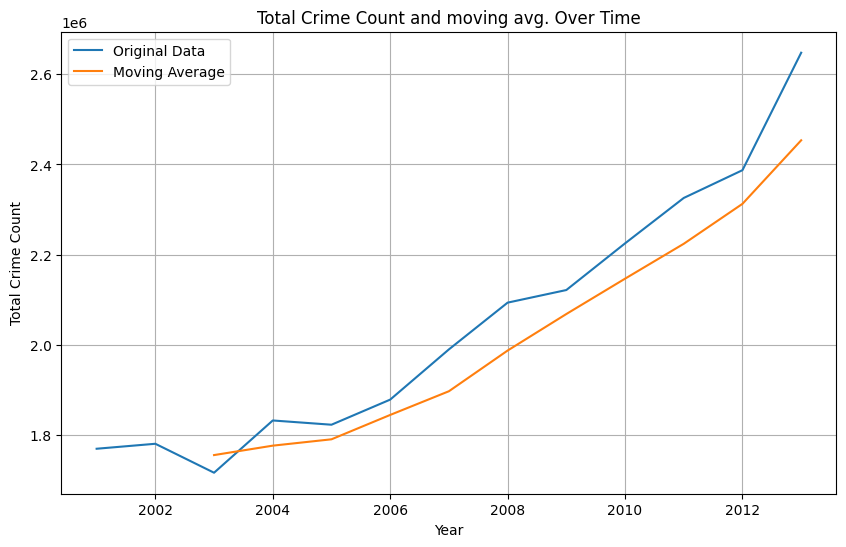

In [ ]:
total_india_crime = merged_df[merged_df['States'] == 'Total (All-India)']
total_india_crime.sort_values(by=['Year'],inplace=True)
total_india_crime.reset_index(drop=True,inplace=True)
crime_by_year = total_india_crime[total_india_crime['Crime_head'] == 'Total Ipc Crimes'].set_index('Year')['Count']
plt.figure(figsize=(6, 6))

#moving avg.
window_size = 3
rolling_mean = crime_by_year.rolling(window=window_size).mean()

plt.figure(figsize=(10, 6))
plt.plot(crime_by_year.index, crime_by_year.values, label='Original Data')
plt.plot(rolling_mean.index, rolling_mean.values, label='Moving Average')
plt.xlabel('Year')
plt.ylabel('Total Crime Count')
plt.title('Total Crime Count and moving avg. Over Time')
plt.legend()
plt.grid(True)
plt.show()

As expected the Crime in India has increased quite drastically from 2001 to 2013 .

In [ ]:
fig = px.line(state_wise_total, x='Year', y='Count', color='States', title='Statewise Total crime vs Year')
fig.update_layout(
    autosize=False,
    width=1000,
    height=600,
)
fig.show()

Among the States and UTs , the states like UP, West bengal , Maharasthra, bihar , kerala , Tamil nadu, Madhya Pradesh , Andhra Pradesh have obviously higher crime numbers and also their growth is also higher .

In [ ]:
# prompt: subplot count vs year for every crime head in state_wise color =states using a plotly

import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create a subplot for each crime head
crime_heads = state_wise['Crime_head'].unique()
rows = (len(crime_heads) + 1) // 2  # Calculate rows for subplots
cols = 2

fig = make_subplots(rows=rows, cols=cols, subplot_titles=crime_heads)

row = 1
col = 1
for crime_head in crime_heads:
    df_crime = state_wise[state_wise['Crime_head'] == crime_head]
    fig.add_trace(
        go.Scatter(
            x=df_crime['Year'],
            y=df_crime['Count'],
            mode='lines',
            name=crime_head,
            legendgroup=crime_head,
            marker=dict(color=df_crime['States']),
        ),
        row=row,
        col=col,
    )

    if col == 2:
        row += 1
        col = 1
    else:
        col += 1

fig.update_layout(
    height=rows * 400,
    width=1000,
    title_text="Statewise Count vs Year for Each Crime Head",
    showlegend=True,
)

fig.show()


In [ ]:
for crime_head in state_wise['Crime_head'].unique():
  df_crime = state_wise[state_wise['Crime_head'] == crime_head]
  fig = px.line(df_crime, x='Year', y='Count', color='States', title=f'{crime_head} Count vs Year')
  fig.update_layout(
      autosize=False,
      width=1000,
      height=600,
  )
  fig.show()

In [ ]:
for crime_head in state_wise['Crime_head'].unique():
  df_crime = state_wise[state_wise['Crime_head'] == crime_head]
  fig = px.scatter(df_crime, x='Grand Total - Actual', y='Count', color='States',
                   title=f'{crime_head} Count vs Actual Police Strength',
                   labels={'Grand Total - Actual': 'Actual Police Strength', 'Count': 'Crime Count'})
  fig.update_layout(
      autosize=False,
      width=1000,
      height=600,
  )
  fig.show()

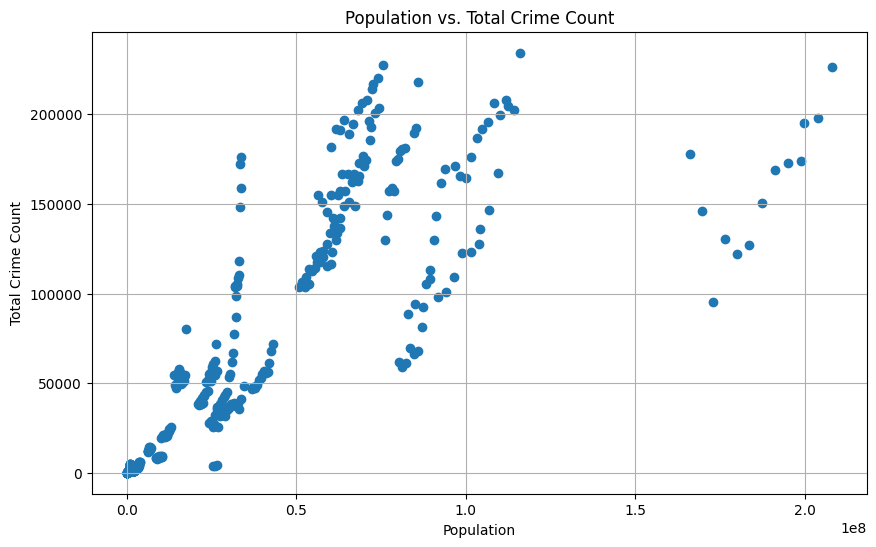

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(state_wise_total['Population'], state_wise_total['Count'])
plt.xlabel('Population')
plt.ylabel('Total Crime Count')
plt.title('Population vs. Total Crime Count')
plt.grid(True)
plt.show()

The plot suggests that there is a positive correlation which means that as population has increased over the years , the crime count has increased as well.

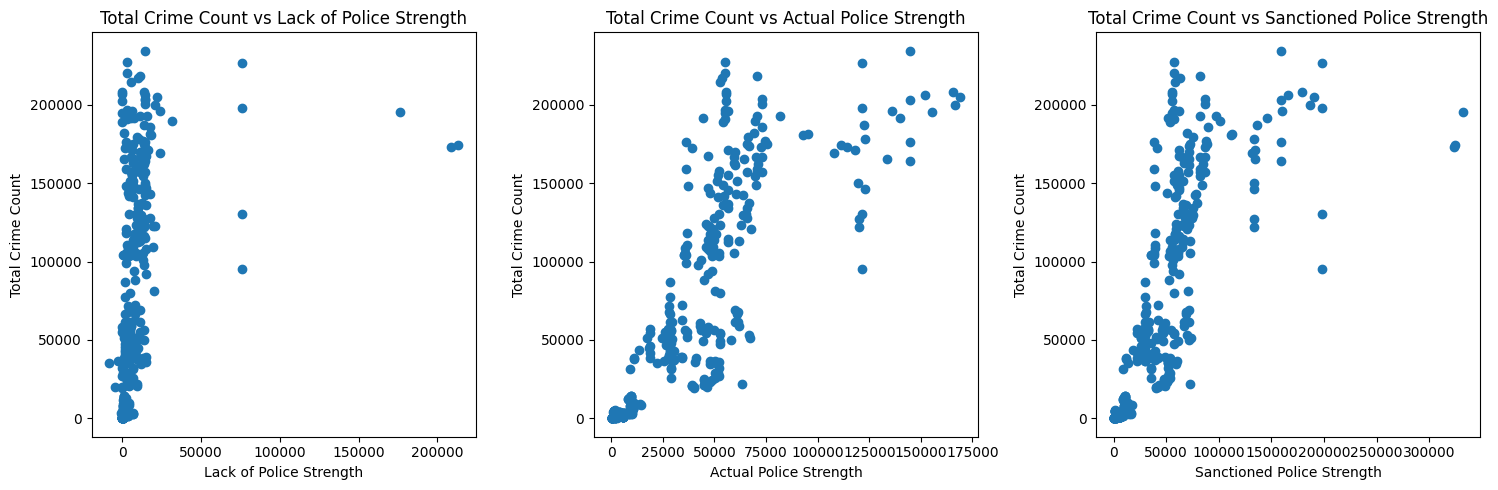

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Subplot 1: Count vs Lack of Police Strength
axes[0].scatter(state_wise_total['Lack of Police Strength'], state_wise_total['Count'])
axes[0].set_xlabel('Lack of Police Strength')
axes[0].set_ylabel('Total Crime Count')
axes[0].set_title('Total Crime Count vs Lack of Police Strength')

# Subplot 2: Count vs Actual Police Strength
axes[1].scatter(state_wise_total['Grand Total - Actual'], state_wise_total['Count'])
axes[1].set_xlabel('Actual Police Strength')
axes[1].set_ylabel('Total Crime Count')
axes[1].set_title('Total Crime Count vs Actual Police Strength')

# Subplot 3: Count vs Sanctioned Police Strength
axes[2].scatter(state_wise_total['Grand Total - Sanctioned'], state_wise_total['Count'])
axes[2].set_xlabel('Sanctioned Police Strength')
axes[2].set_ylabel('Total Crime Count')
axes[2].set_title('Total Crime Count vs Sanctioned Police Strength')

plt.tight_layout()
plt.show()



Total Crime Count vs Lack of Police Strength: This plot shows that there is a slight positive correlation between the lack of police strength and total crime count. This could mean that areas with a shortage of police might have slightly higher crime rates.

Total Crime Count vs Actual Police Strength: This plot shows a clear positive correlation between the actual police strength and total crime count. This could indicate that states with more police officers tend to have reported higher crime counts. It's important to note that this doesn't necessarily mean more police cause more crime; it could be that more police presence leads to better crime reporting and detection.

Total Crime Count vs Sanctioned Police Strength: This plot also shows a positive correlation, similar to the actual police strength. This suggests that the sanctioned strength, which represents the planned or authorized police force, also has a relationship with the total crime count.



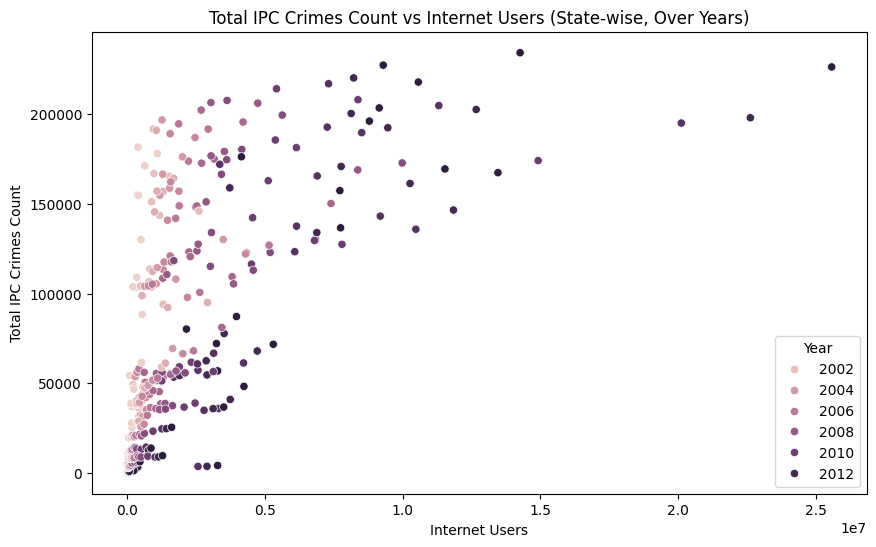

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Internet users', y='Count', data=state_wise_total, hue='Year')
plt.xlabel('Internet Users')
plt.ylabel('Total IPC Crimes Count')
plt.title('Total IPC Crimes Count vs Internet Users (State-wise, Over Years)')
plt.legend(title='Year')
plt.show()

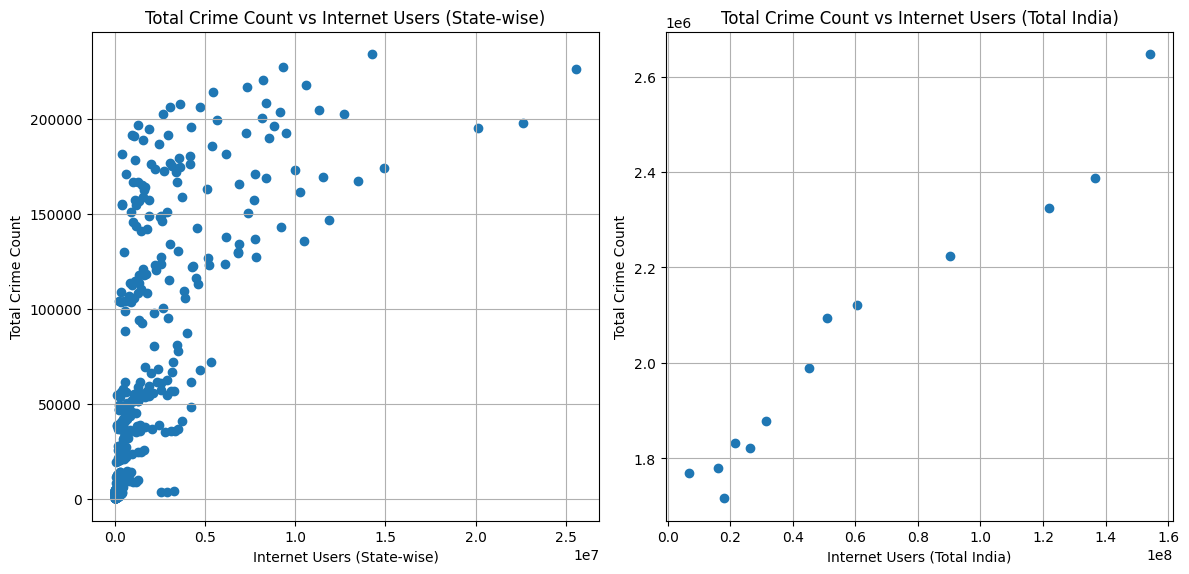

In [ ]:
#Total crime Count vs Internet users
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(state_wise_total['Internet users'], state_wise_total['Count'])
plt.xlabel('Internet Users (State-wise)')
plt.ylabel('Total Crime Count')
plt.title('Total Crime Count vs Internet Users (State-wise)')
plt.grid()

plt.subplot(1, 2, 2)
plt.scatter(total_india_crime[total_india_crime['Crime_head'] == 'Total Ipc Crimes']['Internet users'],
            total_india_crime[total_india_crime['Crime_head'] == 'Total Ipc Crimes']['Count'])
plt.xlabel('Internet Users (Total India)')
plt.ylabel('Total Crime Count')
plt.title('Total Crime Count vs Internet Users (Total India)')

plt.tight_layout()
plt.grid()
plt.show()

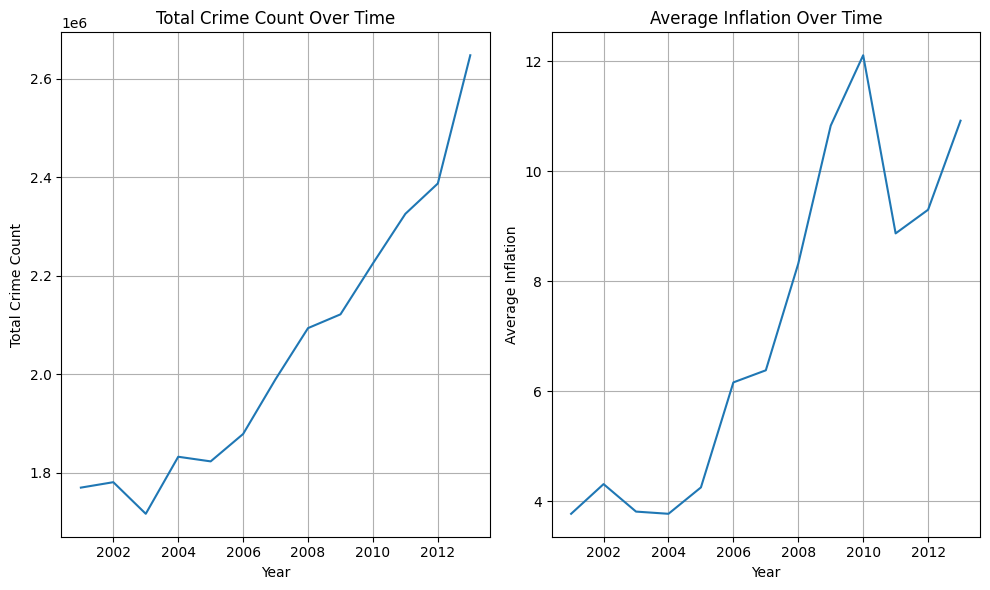

In [ ]:
#plotting crime count and avg inflation against years to compare the trend
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(total_india_crime[total_india_crime['Crime_head'] == 'Total Ipc Crimes'].set_index('Year')['Count'].index,
         total_india_crime[total_india_crime['Crime_head'] == 'Total Ipc Crimes'].set_index('Year')['Count'].values)
plt.xlabel('Year')
plt.ylabel('Total Crime Count')
plt.title('Total Crime Count Over Time')
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(inflation.groupby('Year')['Avg. inflation'].mean().index,
         inflation.groupby('Year')['Avg. inflation'].mean().values)
plt.xlabel('Year')
plt.ylabel('Average Inflation')
plt.title('Average Inflation Over Time')
plt.grid()
plt.tight_layout()
plt.show()

We see that both inflation and the total crime count has increased over the years but a weak correlation suggests that inflation might not be a direct cause of the increasing crime counts , as there might be other factors as well.


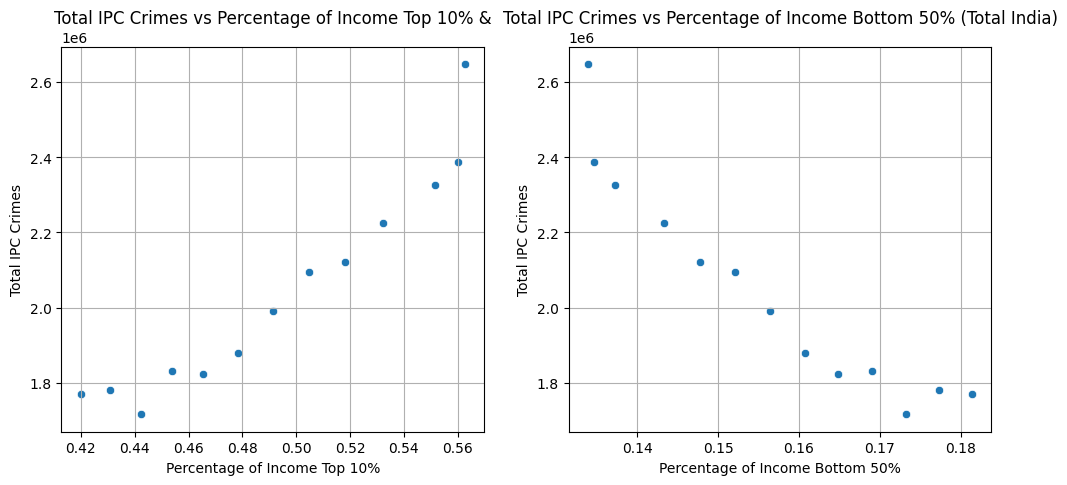

In [ ]:
total_ipc_crimes = total_india_crime[total_india_crime['Crime_head'] == 'Total Ipc Crimes']
# Create a scatter plot for Total IPC Crimes vs Top 10% income
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x='Percentage of income top10%', y='Count', data=total_ipc_crimes)
plt.xlabel('Percentage of Income Top 10%')
plt.ylabel('Total IPC Crimes')
plt.title('Total IPC Crimes vs Percentage of Income Top 10% &')
plt.grid()

# Create a scatter plot for Total IPC Crimes vs Bottom 50% income
plt.subplot(1, 2, 2)
sns.scatterplot(x='Percentage of income bottom50%', y='Count', data=total_ipc_crimes)
plt.xlabel('Percentage of Income Bottom 50%')
plt.ylabel('Total IPC Crimes')
plt.title('Total IPC Crimes vs Percentage of Income Bottom 50% (Total India)')
plt.grid()
plt.show()

As the income of top 10% of our country as a percentage to the total income rises and that of bottom 50% decreases , income inequality rises and that causes crime to rise .


## Correlation

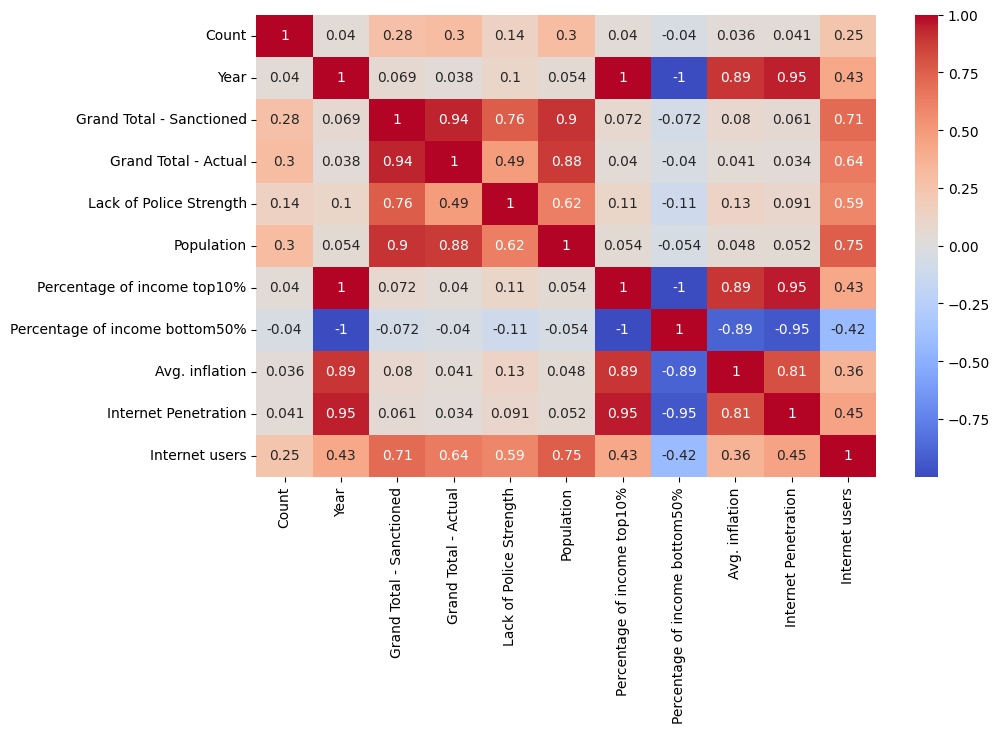

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(state_wise.iloc[:,2:].corr(), annot=True, cmap='coolwarm')
plt.show()

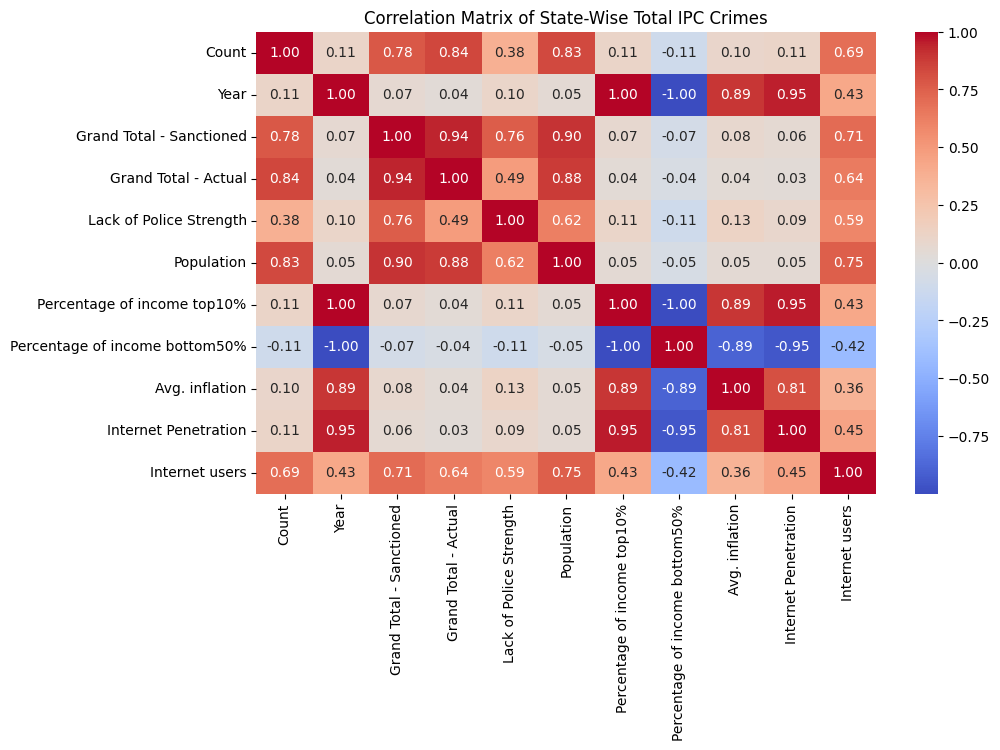

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(state_wise_total.iloc[:,1:].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of State-Wise Total IPC Crimes')
plt.show()

Studying all the graphs , We can conclude that our hypothesis was correct. But as we could not find state wise inflation and income inequality data, applying them on all the states is not a correct approach and it also reflects on the corrrelation matrix also so at the end we dropped the unnecessery features.

In [ ]:
state_wise = state_wise.drop(columns=['Percentage of income top10%', 'Percentage of income bottom50%', 'Internet Penetration', 'Avg. inflation'])
state_wise_total = state_wise_total.drop(columns=['Percentage of income top10%', 'Percentage of income bottom50%', 'Internet Penetration', 'Avg. inflation'])

Now we proceed for the models. but we have decided to split the data into two and apply the models as state_wise_total has more of a linear relationship, we are going to try ridge regression on the data but a dataset of around 400 points is quite less for a model to run but that is the limitation we have to deal with for now .

##Regression Model

In this section we are going to apply the regression models, but on the state_wise_total we are going to run ridge as there is colinearity among the features.
As our first choice for models was tree based models over linear models we are going to switch to tree based models for the rest of the time.

Metrics we have used:
1. MAE; Mean Absolute Error: In our case we will mainly look into the MAE metric, since MAE is robust to outliers and our dataset has many outliers as there is no specific cause of happening crime. Thus, we will see MAE to judge our model performance.
2. R2; Coefficient of Determination: This shows how well our regression model fits the data. The main advantage of using R2 is, it is independent of context.
[R2=1-RSS/TSS] R2 shows the variabilty of our data. R2 approaches to one means we have a good variable data and approaches to zero means just the opposite.
3. MSE; Mean squared error: Since MAE is not a differentiable function, to calculate the loss we use MSE. But MSE has its own disadvantage which is sensitive to outliers. Since our dataset has a lot of outliers, we will not focus on MSE much as it we penalize them and make our errors bigger.
4. RMSE; Root mean squared error: The advantage of this over MSE is that the output value we get is in the same unit as the required output variable which makes interpretation of loss easy.

Reference: From class notes, our own understanding and blogs like:
 https://www.analyticsvidhya.com/blog/2021/05/know-the-best-evaluation-metrics-for-your-regression-model/

Pseudocode of models
(more of what we understood from classes,blogs and documentations)

```
Ridge regression

function ridge_regression(X, y, alpha):
 X_ = [X | 1s]
 I = identity_matrix(n+1)
 I_alpha = I * alpha
 XtX = transpose(X_) * X_
 Xty = transpose(X_) * y
 XtX__alpha_I = XtX + I_alpha
 XtX__alpha_I_inverse = inverse(XtX__alpha_I)
 rd_regression = XtX__alpha_I_inverse * Xty
 return rd_regression

 alpha=0.01 in our case
```
```
DecisionTree Regressor
#importing Decision Tree Regression from sklearn.tree
import DecisionTreeRegressor from sklearn.tree
#defining a function for executing decision tree regression---> in our case we have created a pipeline
function train_decision_tree(X, y, **kwargs):
 #defining decision tree regressor with necessary hyperparameters
 model = DecisionTreeRegressor(
        random_state=42,
        splitter='random',
        min_samples_split=[min_samples_split], #[min_samples_split]=[2,4,6]---> hyperparameter tuning
        min_samples_leaf=[min_samples_leaf]   #[min_samples_leaf]=[1,2,3]---> hyperparameter tuning
 )
 model.fit(X, y) #fitting the model
 return model

#calling decision tree and passing necessary values
model=train_decision_tree(X, y, min_samples_split, min_samples_leaf)

#we have created a pipeline for the entire process. we have only shown the hyperparameters that we have used in our code. there are other several hyperparameters that can be used based on datasets and requirements
```
```
#importing Random Forest Regression from sklearn.tree
import RandomForestRegressor from sklearn.tree
#defining a function for executing random forest regression---> in our case we have created a pipeline
function train_random_forest(X, y, min_samples_split, min_samples_leaf):
 #defining random forest regressor with necessary hyperparameters
 model = RandomForestRegressor(
        n_estimators=[n], #[n]=85--->i.e. number of decission tree used =85
        random_state=[42], #Controls both the randomness of the bootstrapping of the samples used when building trees, generally we use 42
        n_jobs=-1, #the number of jobs to run in parallel, we use it it enhance the performance and reduce the time
        oob_score=True #Score of the training dataset obtained using an out-of-bag estimate, i.e. it is mathematically seen that is 37% of the train data remain untrained and with this function we can use those untrained data as validation set.
        min_samples_split=[min_samples_split], #[min_samples_split]=[2,4,6]---> hyperparameter tuning
        min_samples_leaf=[min_samples_leaf]   #[min_samples_leaf]=[1,2,3]---> hyperparameter tuning
 )
 model.fit(X, y) #fitting the model
 return model

#calling random forest and passing necessary values
model=train_random_forest(X, y, min_samples_split, min_samples_leaf)


#we have created a pipeline for the entire process. we have only shown the hyperparameters that we have used in our code. there are other several hyperparameters that can be used based on datasets and requirements
```
```
#importing gradient boosting regressor from sklearn.ensemble
import GradientBoostingRegressor from sklearn.ensemble
#defining function to train the model with gradient descent
function train_gradient_descent(X, y, n_estimators, learning_rate):
  model = GradientBoostingRegressor(
          random_state=[42], #Controls the random seed given to each Tree estimator at each boosting iteration. In addition, it controls the random permutation of the features at each split.(42--> is commonly used)
          n_estimators=[n], #The number of boosting stages to perform
          learning_rate=[alpha] #Learning rate shrinks the contribution of each tree.
  )
#fitting the model
model.fit(X, y)
#returning value
return model

#calling the function which will train the model
model = train_gradient_boosting(X, y, n_estimators, learning_rate)
```


In [ ]:
set_config(display='diagram')

In [ ]:
def print_evaluation_metrics(y_true, y_pred):
  mse = mean_squared_error(y_true, y_pred)
  rmse = mean_squared_error(y_true, y_pred, squared=False)
  mae = mean_absolute_error(y_true, y_pred)
  r2 = r2_score(y_true, y_pred)
  print(f"Mean Squared Error (MSE): {mse:.2f}")
  print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
  print(f"Mean Absolute Error (MAE): {mae:.2f}")
  print(f"R-squared (R2): {r2:.2f}")

In [ ]:
numerical_feature=['Population','Internet users','Lack of Police Strength','Grand Total - Actual','Grand Total - Sanctioned']
numerical_pipe=Pipeline(steps=[
    ('scaler', StandardScaler())
]
                       )
categorical_pipe=Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
]
                          )
preprocessor=ColumnTransformer(transformers=[
    ('num', numerical_pipe, numerical_feature),
    ('cat', categorical_pipe, make_column_selector(dtype_include=object))
]
                               )

### State wise Total Crime


In [268]:
state_wise_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455 entries, 0 to 454
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   States                    455 non-null    object 
 1   Count                     455 non-null    int64  
 2   Year                      455 non-null    int64  
 3   Grand Total - Sanctioned  455 non-null    float64
 4   Grand Total - Actual      455 non-null    float64
 5   Lack of Police Strength   455 non-null    float64
 6   Population                455 non-null    float64
 7   Internet users            455 non-null    int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 28.6+ KB


In [269]:
state_wise_total['Count'].mean()

58436.0021978022

In [270]:
X=state_wise_total.drop(columns=['Count'])
y=state_wise_total['Count']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [271]:
pipelines = {
    'ridge':make_pipeline(preprocessor,Ridge()),
    'dt':make_pipeline(preprocessor,DecisionTreeRegressor(splitter='random',random_state=42))
}

hyparamgrid = {
    'ridge':{
        'ridge__alpha':[0.01]
    },
    'dt':{
         'decisiontreeregressor__min_samples_split':[2,4,6],
         'decisiontreeregressor__min_samples_leaf':[1,2,3]
     }
}

In [272]:
for key in pipelines.keys():
  display(pipelines[key])

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Population',
                                                   'Internet users',
                                                   'Lack of Police Strength',
                                                   'Grand Total - Actual',
                                                   'Grand Total - Sanctioned']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7a19b9f95f30>)])),
                ('ridge', Ridge())])

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Population',
                                                   'Internet users',
                                                   'Lack of Police Strength',
                                                   'Grand Total - Actual',
                                                   'Grand Total - Sanctioned']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7a19b9f95f30>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42, splitter='random'))])

In [273]:
fit_models = {}

for algo, pipeline in pipelines.items():
    model = GridSearchCV(pipeline, hyparamgrid[algo], cv=9, n_jobs=-1)
    try:
        print('Starting training for {}.'.format(algo))
        model.fit(X_train, y_train)
        fit_models[algo] = model
        print('{} has been successfully fit.'.format(algo))
        print(".........")
    except NotFittedError as e:
        print(repr(e))

for algo,model in fit_models.items():
    yhat = model.predict(X_test)
    print(algo, 'metrics on the test data')
    print_evaluation_metrics(y_test, yhat)
    print(".......")
    print(algo, 'metrics on the train data')
    print_evaluation_metrics(y_train, model.predict(X_train))
    print(".......")

Starting training for ridge.
ridge has been successfully fit.
.........
Starting training for dt.
dt has been successfully fit.
.........
ridge metrics on the test data
Mean Squared Error (MSE): 93542580.62
Root Mean Squared Error (RMSE): 9671.74
Mean Absolute Error (MAE): 5640.39
R-squared (R2): 0.98
.......
ridge metrics on the train data
Mean Squared Error (MSE): 61636088.58
Root Mean Squared Error (RMSE): 7850.87
Mean Absolute Error (MAE): 4050.16
R-squared (R2): 0.99
.......
dt metrics on the test data
Mean Squared Error (MSE): 143955352.27
Root Mean Squared Error (RMSE): 11998.14
Mean Absolute Error (MAE): 6563.11
R-squared (R2): 0.96
.......
dt metrics on the train data
Mean Squared Error (MSE): 24319216.01
Root Mean Squared Error (RMSE): 4931.45
Mean Absolute Error (MAE): 2407.47
R-squared (R2): 0.99
.......


### Statewise Crime head wise

In [275]:
state_wise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8645 entries, 0 to 8644
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   States                    8645 non-null   object 
 1   Crime_head                8645 non-null   object 
 2   Count                     8645 non-null   int64  
 3   Year                      8645 non-null   int64  
 4   Grand Total - Sanctioned  8645 non-null   float64
 5   Grand Total - Actual      8645 non-null   float64
 6   Lack of Police Strength   8645 non-null   float64
 7   Population                8645 non-null   float64
 8   Internet users            8645 non-null   int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 608.0+ KB


In [276]:
state_wise['Count'].mean()

3044.1214574898786

In [277]:
X = state_wise.drop('Count', axis=1)
y = state_wise['Count']
X_train, X_combined, y_train, y_combined = train_test_split(X, y, test_size=0.1, random_state=42)

In [278]:
pipelines = {
    'gd':make_pipeline(preprocessor,GradientBoostingRegressor(random_state=42)),
    'dt':make_pipeline(preprocessor,DecisionTreeRegressor(splitter='random',random_state=42)),
    'rf':make_pipeline(preprocessor,RandomForestRegressor(n_estimators=85,random_state=42,oob_score=True,n_jobs=-1)) #n_estimators=85 to prevent potential overfitting
}

hyparamgrid = {
    'gd':{
        'gradientboostingregressor__learning_rate':[0.01,0.1,1],
        'gradientboostingregressor__n_estimators':[100,200,300]

    },
    'dt':{
        'decisiontreeregressor__min_samples_split':[2,4,6],
        'decisiontreeregressor__min_samples_leaf':[1,2,3]
    },
    'rf': {
        'randomforestregressor__min_samples_split':[2,4,6],
        'randomforestregressor__min_samples_leaf':[1,2,3]
    }
}

In [279]:
for key in pipelines.keys():
  display(pipelines[key])

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Population',
                                                   'Internet users',
                                                   'Lack of Police Strength',
                                                   'Grand Total - Actual',
                                                   'Grand Total - Sanctioned']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7a19b9f95f30>)])),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(random_state=42))])

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Population',
                                                   'Internet users',
                                                   'Lack of Police Strength',
                                                   'Grand Total - Actual',
                                                   'Grand Total - Sanctioned']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7a19b9f95f30>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42, splitter='random'))])

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Population',
                                                   'Internet users',
                                                   'Lack of Police Strength',
                                                   'Grand Total - Actual',
                                                   'Grand Total - Sanctioned']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7a19b9f95f30>)])),
                ('randomforestregressor',
                 RandomForestRegressor(n_estimators=85, n_jobs=-1,
                                       oob_score=True, random_state=42))])

In [ ]:
fit_models = {}

for algo, pipeline in pipelines.items():
    model = GridSearchCV(pipeline, hyparamgrid[algo], cv=9, n_jobs=-1)
    try:
        print('Starting training for {}.'.format(algo))
        model.fit(X_train, y_train)
        fit_models[algo] = model
        print('{} has been successfully fit.'.format(algo))
        print(".........")
    except NotFittedError as e:
        print(repr(e))

for algo,model in fit_models.items():
    yhat = model.predict(X_test)
    print(algo, 'metrics on the test data')
    print_evaluation_metrics(y_test, yhat)
    print(".........")
    print(algo, 'metrics on the train data')
    print_evaluation_metrics(y_train, model.predict(X_train))
    print(".........")

Starting training for gd.
gd has been successfully fit.
.........
Starting training for dt.
dt has been successfully fit.
.........
Starting training for rf.


In [ ]:
for algo, model in fit_models.items():
  if algo == 'rf':
      print(f"oob score for {algo}: {model.best_estimator_.named_steps['randomforestregressor'].oob_score_}")

## Conclusion

Although there is shortage of data on public domains and crime is somewhat an abstract topic, still we are able to build a model which predicts the number of crimes.
For our data we have found decision and random forest to be better choices for the model.
We came to this conclusion by evaluating the metrics we have used.

This kind of model is very useful from a point of view of government for policy making and implimentation. Though we can't add religious angle or political angle so easily to a model but it is quite a fresh start.

As a business point of view it may also help a company of lets say paperspray company. As a paperspray company, I can use the predictive models to point out areas with greater crime numbers especially crime against women and assign salesman accordingly to get maximum sales with minimum employees.


## Citations

We took inspiration from several research papers before proceeding with our domain as crime in India . Several research papers suggested the influence of several socio-economic factors for the increasing crime rates in India with the increase in population. Although some papers suggested the factors such as literacy rates and unemployment , we used inflation as a factor since most of the other data were not available on public platforms.

1.https://www.linkedin.com/pulse/study-crime-rate-india-pritam-dutta-sf8uf
2. https://www.irjmets.com/uploadedfiles/paper/volume2/issue_11_november_2020/4756/1628083190.pdf
3. chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://jusst.org/wp-content/uploads/2021/04/Identification-of-Regression-Model-for-Crime-Rate-and-Literacy-Rate-in-India.pdf
4. chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://www.ijcaonline.org/archives/volume183/number26/vaishnav-2021-ijca-921651.pdf
5. https://www.researchgate.net/publication/368729412_Crime_Analysis_Using_Linear_Regression
6.https://www.researchgate.net/publication/281450865 [Paula Branco, University of Ottawa]